<a href="https://colab.research.google.com/github/DariaMatvienko/FLab/blob/main/FourLab_Matvienko_Daria_RI_481223.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание 1  
Реализуйте класс LinearRegressionSGD c обучением и и применением линейной регрессии, построенной с помощью стохастического градиентного спуска, с заданным интерфейсом.

Обратите внимание на следуюшие моменты:

- Схожий класс использовался в лекции  
- Выбирайте 10 случайных сэмплов (равномерно) каждый раз.  
- Используйте параметры по умолчанию (epsilon=1e-6, max_steps=10000, w0=None, alpha=1e-8)  
- Выход из цикла осуществуется по сравнению 2-нормы разницы весов с epsilon, а функция потерь - MSE. 
  
Визуализируйте траекторию градиентного спуска (как в лекции)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import random

np.random.seed(0)

In [58]:
from sklearn.base import BaseEstimator

class LinearRegressionSGD(BaseEstimator):
    def __init__(self, epsilon=1e-6, max_steps=10000, w0=None, alpha=1e-8):
        """
        epsilon: разница для нормы изменения весов 
        max_steps: максимальное количество шагов в градиентном спуске
        w0: np.array (d,) - начальные веса
        alpha: шаг обучения
        """
        self.epsilon = epsilon
        self.max_steps = max_steps
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.w_history = []
    
    def fit(self, X, y):
        """
        X: np.array (l, d)
        y: np.array (l)
        ---
        output: self
        """
        l, d = X.shape

        if self.w0 is None: # если нет начальной инициализации весов
            self.w0 = np.zeros(d)

        self.w = self.w0
        
        for step in range(self.max_steps):
          self.w_history.append(self.w)
          Xi=[]
          yi=[]
          ## Для выполнения шага выберите 10 случайных(равномерно) сэмплов
          for i in range(10):
              Xii=[]
              yii=[]
              for i in random.choice(X):
                Xii.append(i)
              Xi.append(Xii)
              yii=random.choice(y)
              yi.append(yii)
          w_new = self.w - self.alpha * self.calc_gradient(Xi, yi)
          if (np.linalg.norm(w_new - self.w) < self.epsilon): 
            break
          self.w = w_new
        ## На каждом шаге градиентного спуска веса можно добавлять в w_history (для последующей отрисовки)
        return self
    
    def predict(self, X):
        """
        X: np.array (l, d)
        ---
        output: np.array (l)
        """
        if self.w is None:
            raise Exception('Not trained yet')
        
        l, d = X.shape

        y_pred = []

        for i in range(l):
            y_pred.append(np.dot(X[i],self.w))

        return np.array(y_pred)
    
    def calc_gradient(self, X, y):
        """
        X: np.array (l, d)
        y: np.array (l)
        ---
        output: np.array (d)
        """
        l,d= np.shape(X)
        gradient = []
        Xm = np.asarray(X)
        Xt=Xm.transpose()#транспонируем матрицу
        for j in range(d):
            dQ = 0
            for i in range(l):
              dQ+=(2/l) * Xt[j][i] * (np.dot(X[i], self.w) - y[i])
            gradient.append(dQ)
        return np.array(gradient)

In [59]:
def plot_sgd(X, y, w_history):
    # compute level set
    A, B = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - y, 2))

    plt.figure(figsize=(13, 9))
    plt.title('GD trajectory')
    plt.xlabel(r'$w_1$')
    plt.ylabel(r'$w_2$')
    plt.xlim((-2.1, 2.1))
    plt.ylim((-2.1, 2.1))

    # visualize the level set
    CS = plt.contour(A, B, levels, levels=np.logspace(0, 2, num=10), cmap=plt.cm.rainbow_r)
    CB = plt.colorbar(CS, shrink=0.8, extend='both')

    # visualize trajectory
    w_list = np.array(lrs.w_history)
    plt.scatter(w_true[0], w_true[1], c='r', marker='*')
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])
    plt.show()

Значение SGD=  [array([-1.9995425 , -0.79066971])]


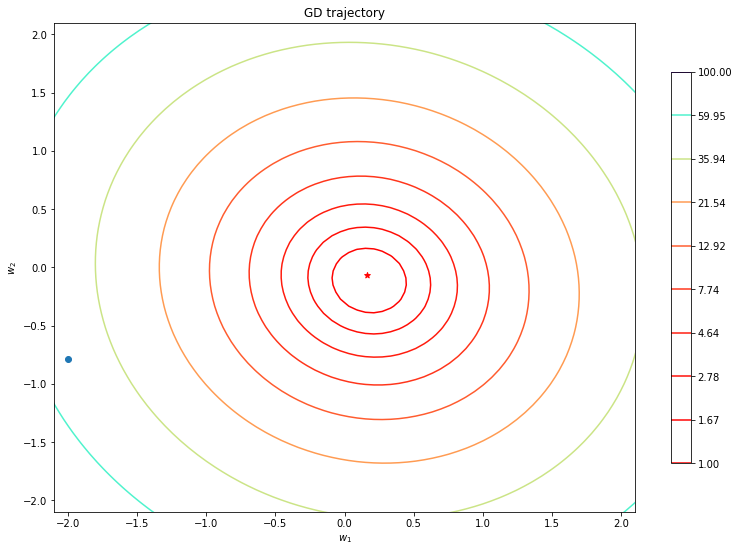

In [61]:
n_features = 2
n_objects =300 #количество объектов
num_steps = 100

np.random.seed(1)
w_true = np.random.normal(0, 0.1, size=(n_features, ))
w_0 = np.random.uniform(-2, 2, (n_features))

X = np.random.uniform(-5, 5, (n_objects, n_features))
y = np.dot(X, w_true) + np.random.normal(0, 1, (n_objects))

lrs = LinearRegressionSGD(w0=w_0)
lrs.fit(X, y)
print("Значение SGD= ",lrs.w_history)
plot_sgd(X, y, lrs.w_history)


При входных epsilon=1e-6 и alpha=1e-8 получаем в ходе стохастического градиентного спуска одно значение, что образует точку на графике.

Задание 2  
Предсказать стоимость домов

Сравнить алгоритмы линейной регресии с полным градиентным спуском и стохастическим градиентным спуском по MSE на тестовой выборке и времени работы алгоритма

In [6]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

data = load_boston()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(np.array(X), y, test_size=0.3, random_state=10)

In [7]:
from sklearn.metrics import mean_squared_error
import time
def MT(y_t, y_p):
  startTime = time.time()
  mse=mean_squared_error(y_t, y_p)

  endTime = time.time()
  Time=endTime-startTime
  return mse,Time

In [42]:
class LinearRegression(BaseEstimator):
    def __init__(self, epsilon=1e-4, max_steps=1000, w0=None, alpha=1e-6):
        
        self.epsilon = epsilon # разница для нормы изменения весов 
        self.max_steps = max_steps # максимальное количество шагов
        self.w0 = w0 # начальные веса
        self.alpha = alpha # шаг обучения
        self.w = None
        self.w_history = []
    
    def fit(self, X, y):
        
        l, d = X.shape

        if self.w0 is None: # если нет начальной инициализации весов
            self.w0 = np.zeros(d)

        self.w = self.w0
        for step in range(self.max_steps):
            self.w_history.append(self.w)
            
            w_new = self.w - self.alpha * self.calc_gradient(X, y)

            if (np.linalg.norm(w_new - self.w) < self.epsilon):
              break
            self.w = w_new
        return self
    
    def predict(self, X):
        """
        X: np.array (l, d)
        ---
        output: np.array (l)
        """
        if self.w is None:
            raise Exception('Not trained yet')
        
        l, d = X.shape

        y_pred = []
        for i in range(l):
            y_pred.append(np.dot(X[i],self.w))
        return np.array(y_pred)
    
    def calc_gradient(self, X, y):
        
        l, d = X.shape
        gradient = []
        
        for j in range(d):
            dQ = 0
            for i in range(10):
              dQ += (2/l) * X[i][j] * (np.dot(X[i], self.w) - y[i])
            gradient.append(dQ)
        return np.array(gradient)

In [43]:
n_features=13
w_0 = np.random.uniform(-2, 2, (n_features))
lr=LinearRegression(w0=w_0)
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)
print("Predictions")
print(y_pred)
MSE,Time=MT(y_test,y_pred)
print("LinearRegression: ","MSE=",MSE," ,Time=",Time)
lrs=LinearRegressionSGD(w0=w_0)
lrs.fit(X_train, y_train)
y_pred=lrs.predict(X_test)
print("Predictions")
print(y_pred)
MSE,Time=MT(y_test,y_pred)
print("SGDRegression: ","MSE=",MSE," ,Time=",Time)

Predictions
[ 2.63599429e+01  2.77739805e+01  2.44154416e+01  1.51351422e+01
  7.09142954e+00  2.27320505e+01 -2.72214655e+00  2.60885831e+01
  3.01654588e+01  1.91347081e+00  1.07239353e+01  1.23442836e+01
  1.63563767e+01  2.28195574e+01  3.02676797e+01 -4.50584164e+00
  3.52387450e+01  1.13106828e+01  1.65455301e+01  1.20583637e+01
 -1.86237234e+00  1.98078368e+01  1.30053290e-02  2.58799004e+01
  9.32402706e+00  3.28964111e+01  1.59195565e+01  2.14478071e+01
  1.55958572e+01  2.51038033e+01  1.37016158e+01  7.79501720e+00
  2.79730141e+01  4.09505671e+01  2.38711443e+01  1.65067588e+01
  3.79408396e+01  3.66471489e+01  1.68181289e+01  2.21186117e+00
  3.04649150e+01  8.06294265e+00  1.76532378e+01  2.30137535e+01
  2.55028478e+01  1.09196573e+01  1.95544136e+01  6.19837918e+00
  1.14604712e+01  1.72656357e+01  7.90430323e+00  2.22497732e+01
  1.83971967e+01  1.16070447e+01  1.06464488e+01  2.55458568e+00
  1.16795772e+01  2.05627925e+01  2.84434294e+01 -2.14012386e+00
  1.70560173e

Изменяя параметры epsilon и alpha, были подобраны оптимальные значения, чтобы MSE и предсказанные значения были с небольшой разницей. По времени выполнения Линейная регрессия на несколько стотысячных быстрее, но по средней квадратической ошибке выигрывает модель Стохастической линейной регрессии.  
Ещё были опробованы встроенные функции для линейной регрессии и регрессора стохастического градиентного спуска.

In [20]:
from sklearn.linear_model import LinearRegression,SGDRegressor
LR=LinearRegression()
LR.fit(X_train, y_train)
y_pred=LR.predict(X_test)
print("Predictions")
print(y_pred)
MSE,Time=MT(y_test,y_pred)
print("LinearRegression: ","MSE=",MSE," ,Time=",Time)
LRS=SGDRegressor(max_iter=1000)
LRS.fit(X_train, y_train)
y_pred=LRS.predict(X_test)
print("Predictions")
print(y_pred)
MSE,Time=MT(y_test,y_pred)
print("SGDRegression: ","MSE=",MSE," ,Time=",Time)

[28.4 31.1 23.5 26.6 19.6 14.3 50.  14.3 20.7 37.6 20.4 27.5 36.2 32.
 33.1 48.8 24.6 26.4 23.2 17.  41.3 14.9 18.5 25.  36.4 19.5 27.1 14.9
 46.  17.9 30.3 31.6 23.1 24.7 16.7 18.3  8.4 37.3 22.1 22.  46.7 30.1
 12.1 29.1 16.6 23.9 19.9 21.4 45.4 15.6 22.7 12.5 24.3 43.8 22.  33.8
 19.3 22.6 16.1 15.  19.6 21.2 50.  50.  29.4 17.8 22.8  8.8 32.5 42.8
 12.6 28.6 19.1 50.  27.5 23.7 50.   7.2 18.7 37.  22.9 22.9 17.1 22.
 23.6 23.9 27.1 29.  22.2  7.  20.7 18.5 21.6 23.  16.  15.  23.9 24.4
 22.6 19.8 22.2 18.6 19.7 23.1 13.5 21.2 23.1 13.6 22.8 18.2 13.1 23.2
 22.8 25.1 18.9 10.9 19.3 17.4 15.6 20.6 50.  32.7 21.8 13.4 16.6 23.6
 11.  23.8 23.1 33.2 28.2  8.5 32.4 29.6 17.1 24.2 26.4 33.2 10.5  8.8
 28.  10.5 15.4 15.3 10.4 15.7 43.1 24.7 21.  19.4 10.9 21.7]
Predictions
[31.4243217  31.96785487 30.93785448 22.34313349 18.83846235 16.20617519
 35.92908162 14.74157477 25.07700756 37.13230282 21.47652971 30.92661826
 28.07823424 34.02599249 33.7778476  40.63701192 24.25899783 23.43019291

При сравнении видно, что по времени алгоритм Стохастического градиентного спуска работает немного быстрее, и среднеквадратичная ошибка гораздо меньше. Следовательно, этот метод эффективнее.  
В результате апробирования двух методов проверки регрессоров - прописанного вручную и встроенного - было выявлено, что модель Стохастического градиентного спуска лучше работает на данных Бостонских домов.